In [1]:
library(tidyverse)
library(MLmetrics)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



In [2]:
pandas = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geopandas_intensive2000a.tsv", col_names = c("TID", "pandas")) %>%
    arrange(desc(pandas))
head(pandas)
nrow(pandas)

Parsed with column specification:
cols(
  TID = col_character(),
  pandas = col_double()
)


TID,pandas
T42101000324,38.12638
T42101000159,21.81991
T42101000160,21.62135
T42101000330,20.78395
T42101000229,20.62140
T42101000184,20.56308


[1] 367

In [4]:
spark = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geospark_intensive2000.tsv", col_names = c("TID", "spark")) %>%
    arrange(desc(spark))
head(spark)
nrow(spark)

Parsed with column specification:
cols(
  TID = col_character(),
  spark = col_double()
)


TID,spark
T42101000324,38.11749
T42101000159,21.81991
T42101000160,21.62135
T42101000330,20.78395
T42101000229,20.62140
T42101000184,20.56308


[1] 366

In [5]:
table = pandas %>% left_join(spark, by = c("TID"))
head(table)
nrow(table)

TID,pandas,spark
T42101000324,38.12638,38.11749
T42101000159,21.81991,21.81991
T42101000160,21.62135,21.62135
T42101000330,20.78395,20.78395
T42101000229,20.62140,20.62140
T42101000184,20.56308,20.56308


[1] 367

In [6]:
head(table %>% filter(is.na(spark)))

TID,pandas,spark
T42101005099,0,NA


In [7]:
table = spark %>% inner_join(pandas, by = c("TID")) %>% 
    mutate(diff = abs(pandas - spark)) %>%
    arrange(desc(diff))
head(table)
nrow(table)

TID,spark,pandas,diff
T42101000043,0.27199356,13.942530,13.6705365
T42101000026,0.22256543,8.038569,7.8160034
T42101000049,0.05456310,5.872965,5.8184015
T42101000058,0.03402696,4.335121,4.3010943
T42101000059,0.32093933,3.650612,3.3296728
T42101000209,11.59267598,12.231093,0.6384174


[1] 366

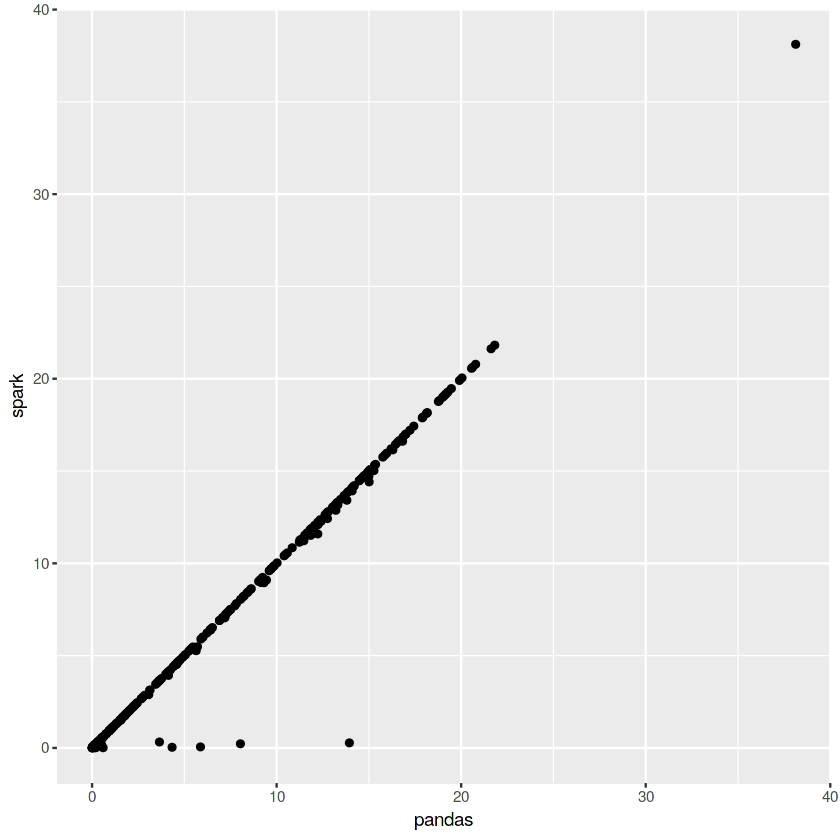

In [8]:
ggplot(data = table, aes(x = pandas, y = spark)) + geom_point()

In [9]:
print(paste("R2:   ", R2_Score(table$spark, table$pandas)))
print(paste("MAE:  ",      MAE(table$spark, table$pandas)))
print(paste("MSE:  ",      MSE(table$spark, table$pandas)))
print(paste("RMSE: ",     RMSE(table$spark, table$pandas)))
print(paste("RAE:  ",      RAE(table$spark, table$pandas)))
print(paste("MAPE: ",     MAPE(table$spark, table$pandas)))


[1] "R2:    0.979943719396579"
[1] "MAE:   0.119453175632082"
[1] "MSE:   0.858532333550596"
[1] "RMSE:  0.926570198932923"
[1] "RAE:   0.0211762739389356"
[1] "MAPE:  0.026530126011736"
